In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1,encoding="iso-8859-1")
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [3]:
file = '../data/fluke_18-10-2021_22-10-2021.csv'
fluke = importa_fluke(file)
fluke

,fluke
tiempo,
2021-10-18 12:23:29,468.0
2021-10-18 12:24:29,459.0
2021-10-18 12:25:29,450.0
2021-10-18 12:26:29,451.0
2021-10-18 12:27:29,428.0
...,...
2021-10-22 15:11:29,476.0
2021-10-22 15:12:29,472.0
2021-10-22 15:13:29,475.0


In [4]:
s8lp    = pd.read_csv('../data/S8LP.csv',index_col=0,parse_dates=True)
sen0220 = pd.read_csv('../data/SEN0220.csv',index_col=0,parse_dates=True)
scd30   = pd.read_csv('../data/SCD30.csv',index_col=0,parse_dates=True)
datos = pd.concat([s8lp,sen0220,scd30,fluke],axis=0)
sensores = datos.columns
datos.to_csv('../data/test.csv')

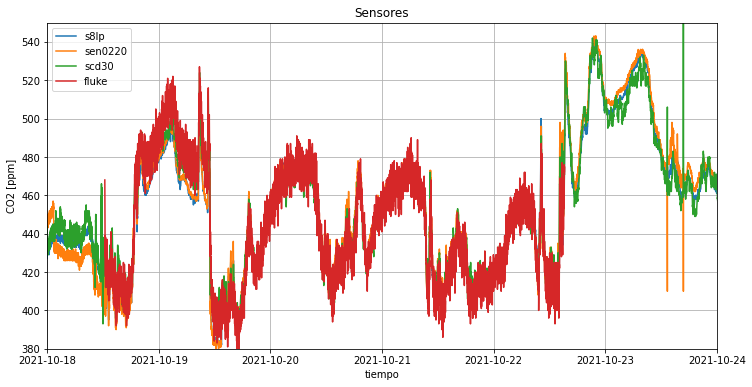

In [6]:

fig, ax = plt.subplots(figsize=(12,6))

fecha1 = parse("2021-10-18 00:00") 
fecha2 = fecha1 + pd.Timedelta("6D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(380,550)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.plot(datos[sensor],label=sensor)

ax.legend()